In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Loading dataset:-
nidd = pd.read_csv('/content/sample_data/5gnidd.csv', low_memory = False)
nidd.head()

,Unnamed: 0,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,Label,Attack Type,Attack Tool
0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
1,1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
2,2,3,4.998020,4.998020,4.998020,4.998020,4.998020,4.998020,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
3,3,4,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
4,4,5,4.999453,4.999453,4.999453,4.999453,4.999453,4.999453,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign


In [ ]:
nidd.tail()

,Unnamed: 0,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,Label,Attack Type,Attack Tool
220064,220064,4439,0.0,0.0,0.0,0.0,0.0,0.0,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Malicious,UDPFlood,Hping3
220065,220065,4440,0.0,0.0,0.0,0.0,0.0,0.0,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Malicious,UDPFlood,Hping3
220066,220066,4441,0.0,0.0,0.0,0.0,0.0,0.0,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Malicious,UDPFlood,Hping3
220067,220067,4442,0.0,0.0,0.0,0.0,0.0,0.0,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Malicious,UDPFlood,Hping3
220068,220068,4443,0.0,0.0,0.0,0.0,0.0,0.0,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Malicio,NaN,NaN


In [ ]:
# Dropping unnecessary columns:-
unnecessary_col = ['Unnamed: 0','RunTime','Min','Max','sTos','dTos','sDSb','dDSb',
                   'sHops','dHops','SrcWin','DstWin','sVid','dVid','SrcTCPBase',
                   'DstTCPBase','TcpRtt','SynAck','AckDat'
                  ]
nidd = nidd.drop(unnecessary_col, axis = 1)


In [ ]:
# Dropping missing values:-
nidd = nidd.dropna()

In [ ]:
# Checking for duplicate rows:-
print(nidd.duplicated().sum())
# droping duplicate rows:
nidd = nidd.drop_duplicates()
print(nidd.shape)
print(nidd.head())

0
(1078, 33)
    Seq       Dur      Mean       Sum Proto  sTtl  dTtl  Cause  TotPkts  \
23   20  0.124988  0.124988  0.124988   tcp  64.0  53.0  Start       10   
47   40  0.001938  0.001938  0.001938   tcp  50.0  59.0  Start        2   
56   45  0.014995  0.014995  0.014995   tcp  63.0  59.0  Start        3   
58   47  0.015981  0.015981  0.015981   tcp  63.0  59.0  Start        3   
68   57  0.001547  0.001547  0.001547   tcp  45.0  59.0  Start        2   

    SrcPkts  ...  pLoss  SrcGap  DstGap        Rate    SrcRate    DstRate  \
23        5  ...    0.0     0.0     0.0   72.006912  32.003075  32.003075   
47        1  ...    0.0     0.0     0.0  515.995850   0.000000   0.000000   
56        2  ...    0.0     0.0     0.0  133.377792  66.688896   0.000000   
58        2  ...    0.0     0.0     0.0  125.148613  62.574306   0.000000   
68        1  ...    0.0     0.0     0.0  646.412415   0.000000   0.000000   

    State      Label  Attack Type  Attack Tool  
23    CON     Benign    

In [ ]:
# Separating feature columns(X) and Label columns(Y):-
x = nidd.drop(['Label','Attack Type','Attack Tool'], axis = 1)
y = nidd['Label']

In [ ]:
# Converting categorical columns into numerical columns using one-hot encoding:-
categorical_col = ['Proto','Cause','State']
x = pd.get_dummies(x, columns = categorical_col)

# Converting dataframe to numpy array:-
x = x.to_numpy()

In [ ]:
# Converting labels to num_features:-
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Converting target var. into one-hot-encoding:-
numerical_classes = len(label_encoder.classes_)
y = tf.keras.utils.to_categorical(y, numerical_classes)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
col_to_scale = ['Seq','Dur','Mean','Sum','TotPkts','SrcPkts','DstPkts','TotBytes','SrcBytes','DstBytes','Offset','sMeanPktSz','dMeanPktSz','Load','SrcLoad','DstLoad','Loss','SrcLoss','DstLoss','pLoss','Rate','SrcRate','DstRate','SrcGap','DstGap','sTtl','dTtl']
numeric_data = nidd[col_to_scale]
# Min-Max Scaling:-
min_max_sclaing = MinMaxScaler()

# Applying Z-Score Normalization:-
standard_scaling = StandardScaler()
standard_scaled_data = standard_scaling.fit_transform(numeric_data)
standard_scaled_data = pd.DataFrame(standard_scaled_data, columns = col_to_scale)

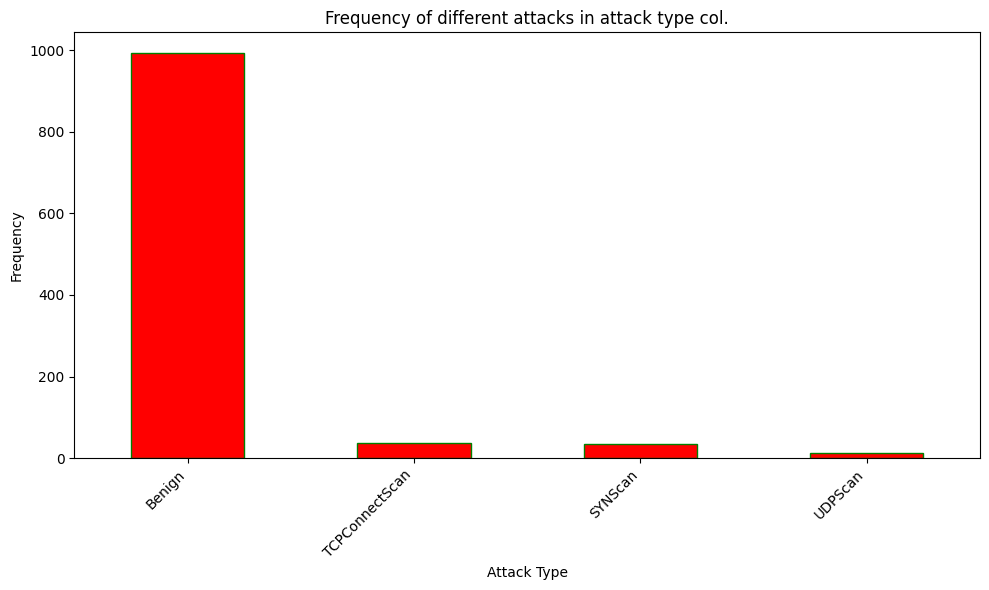

In [ ]:
# Understanding the frequencies of attacks:-
attack_types_counts = nidd['Attack Type'].value_counts()
plt.figure(figsize = (10, 6))
attack_types_counts.plot(kind = 'bar', color = 'red', edgecolor = 'green')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.title('Frequency of different attacks in attack type col.')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

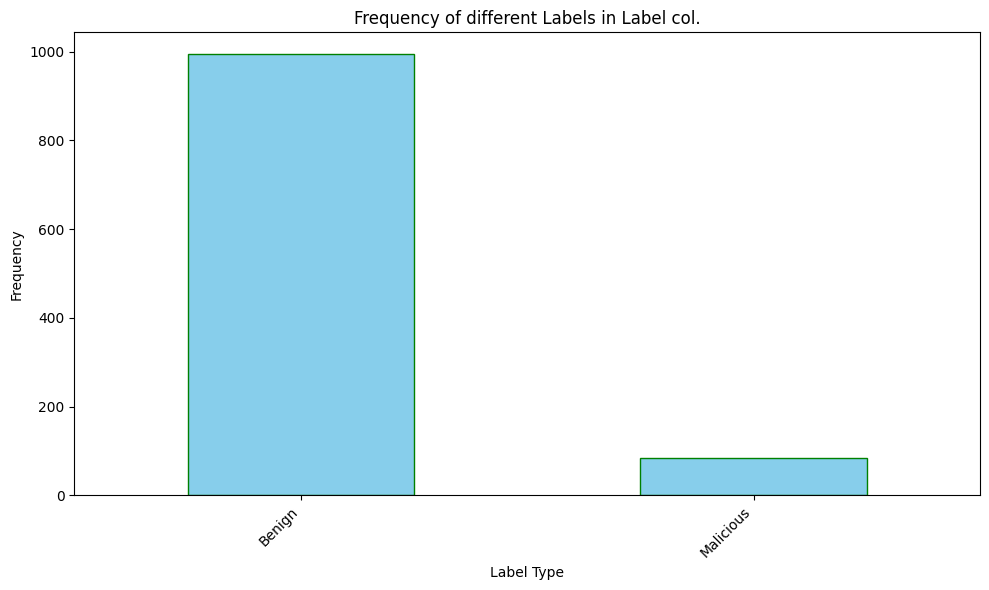

In [ ]:
# Understanding the frequencies of labels:-
label_counts = nidd['Label'].value_counts()
plt.figure(figsize = (10, 6))
label_counts.plot(kind = 'bar', color = 'skyblue', edgecolor = 'green')
plt.xlabel('Label Type')
plt.ylabel('Frequency')
plt.title('Frequency of different Labels in Label col.')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

<ipython-input-51-3b0a78f916da>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(nidd.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')


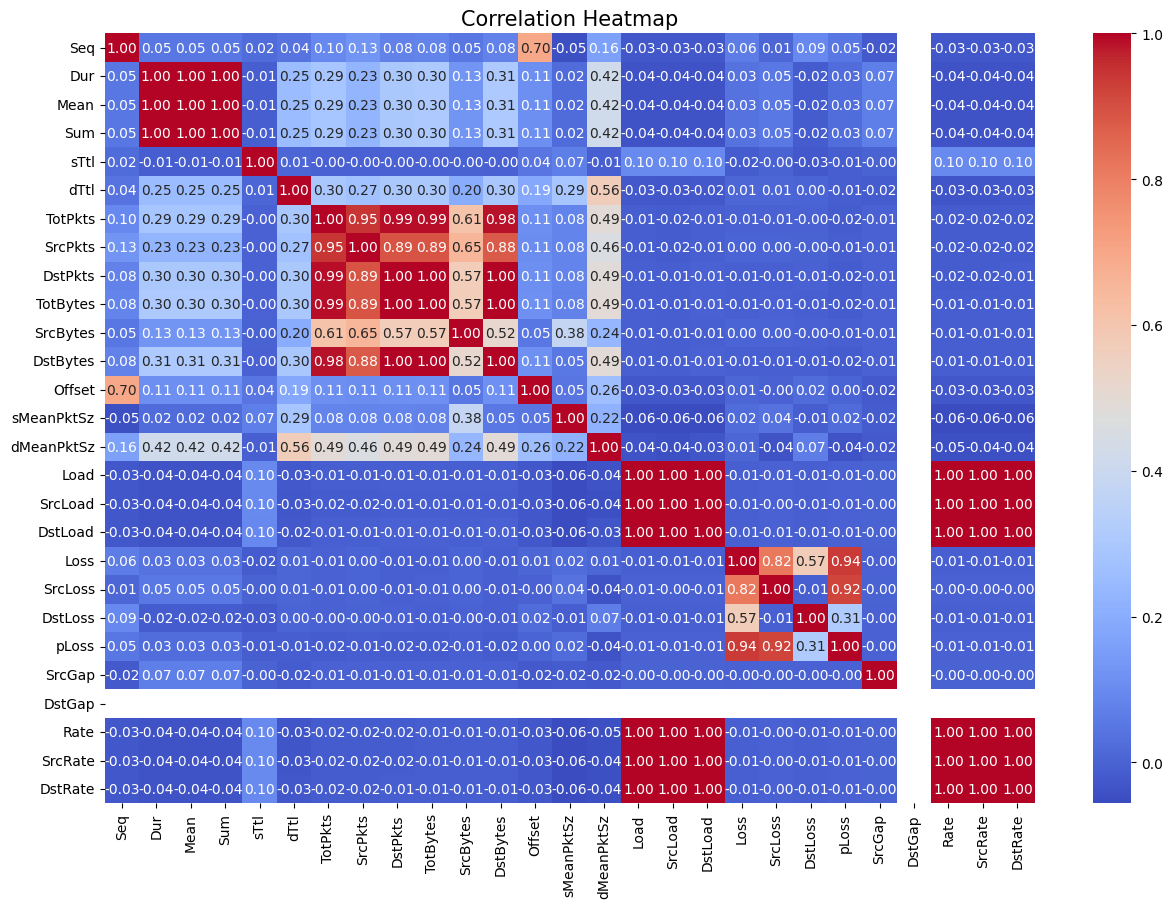

In [ ]:
import seaborn as sns
# Correlation heatmap:-
plt.figure(figsize = (15, 10))
sns.heatmap(nidd.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap', fontsize = 15)
plt.show()

In [ ]:
# Splitting data into training and testing sets:-
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)
# Converting numpy arrays to tensorflow tensors:-
x_train = tf.convert_to_tensor(x_train, dtype = tf.float32)
x_test = tf.convert_to_tensor(x_test, dtype = tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype = tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype = tf.float32)

In [ ]:
# Buidling NN Model:-
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (x_train.shape[1],)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(numerical_classes, activation = 'softmax')
])

# Model compilation:-
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['Accuracy'])


In [ ]:
# Model Summary:-
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               4352      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 2)                 130       
                                                                 
Total params: 12,738
Trainable params: 12,738
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the model:-
epochs = 100
batch_size = 128
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_split = 0.3)


Epoch 1/100
5/5 [==============================] - 2s 69ms/step - loss: 2048.3708 - Accuracy: 0.8292 - val_loss: 1051.3873 - val_Accuracy: 0.9251
Epoch 2/100
5/5 [==============================] - 0s 19ms/step - loss: 1871.3292 - Accuracy: 0.9279 - val_loss: 2646.7864 - val_Accuracy: 0.9295
Epoch 3/100
5/5 [==============================] - 0s 19ms/step - loss: 2744.5156 - Accuracy: 0.9222 - val_loss: 2556.0403 - val_Accuracy: 0.9251
Epoch 4/100
5/5 [==============================] - 0s 22ms/step - loss: 2393.1648 - Accuracy: 0.9203 - val_loss: 1794.5919 - val_Accuracy: 0.9251
Epoch 5/100
5/5 [==============================] - 0s 18ms/step - loss: 1219.2792 - Accuracy: 0.9127 - val_loss: 595.6039 - val_Accuracy: 0.9207
Epoch 6/100
5/5 [==============================] - 0s 21ms/step - loss: 604.6339 - Accuracy: 0.8975 - val_loss: 293.7050 - val_Accuracy: 0.9251
Epoch 7/100
5/5 [==============================] - 0s 21ms/step - loss: 280.2151 - Accuracy: 0.9146 - val_loss: 160.5110 - val_

In [ ]:
# Model Evaluation:-
loss, accuracy = model.evaluate(x_test, y_test, batch_size = batch_size)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

3/3 [==============================] - 0s 11ms/step - loss: 188.1800 - Accuracy: 0.9074
Test Loss: 188.1800, Test Accuracy: 0.9074


In [ ]:
# Making Predictions:-
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_test_classes = np.argmax(y_test, axis = 1)

# Converting predicted labels into original labels:-
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)
y_test_labels = label_encoder.inverse_transform(y_test_classes)


11/11 [==============================] - 0s 4ms/step


In [ ]:
# Calculating accuracy and generating classification report:-
model_accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f'Accuracy is: {model_accuracy:.4f}')

classification_rep = classification_report(y_test_labels, y_pred_labels)
print('Classification Report is:')
print(classification_rep)



Accuracy is: 0.9074
Classification Report is:
              precision    recall  f1-score   support

      Benign       0.94      0.96      0.95       295
   Malicious       0.48      0.41      0.44        29

    accuracy                           0.91       324
   macro avg       0.71      0.68      0.70       324
weighted avg       0.90      0.91      0.90       324



In [ ]:
# Generating Confusion Matrix:-
confusion_metrics = confusion_matrix(y_test_labels, y_pred_labels)
print('Confusion Matrix is:')
print(confusion_metrics)

Confusion Matrix is:
[[282  13]
 [ 17  12]]
